# Classificazione multiclasse
In questo notebook eseguiremo una classificazione multiclasse utilizzando la tecnica OneVsAll (OvA) conosciuta anche come OneVsRest (OvR).<br>
La OvA ci permette di affrontare una classificazione multiclasse come più classificazioni binomiali.<br>
Eseguiremo la classificazione su un dataset di immagini di numeri scritti a mano, per la quale proveremo a classificare il numero figurato nell'immagine.
Importiamo le librerie necessarie.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

%matplotlib inline

Utilizziamo la funzione <span style="font-family: Monaco">load digit</span> di scikit-learn per importare il dataset.

In [2]:
digits = load_digits()

Creiamo gli array per l'addestramento e per il testing.

In [3]:
X = digits.data
Y = digits.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
X_train.shape

(1257, 64)

Il set di addestramento contiene 1257 esempi, le immagini sono in grayscale in formato 8x8 pixel, quindi avremo un totale di 64 proprietà, una per ogni pixel.<br>
Proviamo a visualizzare un esempio di immagine per ogni classe, possiamo utilizzare la funzione imshow di matplotlib, la quale è in grado di mostrare un immagine da una matrice di valori.

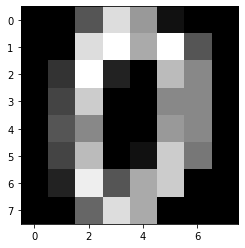

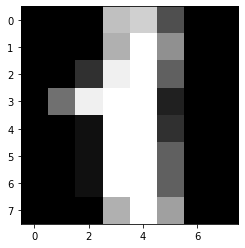

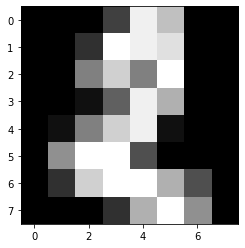

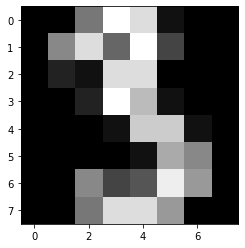

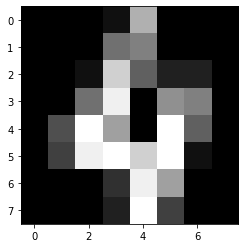

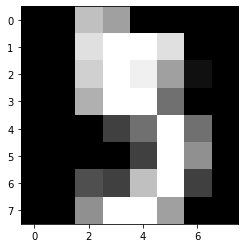

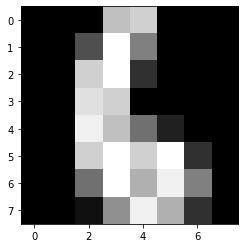

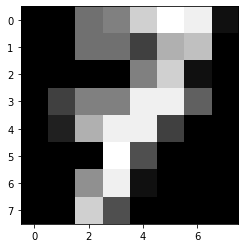

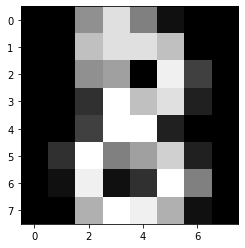

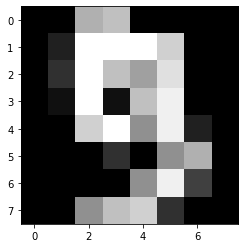

In [4]:
for i in range(0,10):
    pic_matrix = X[Y==i][0].reshape([8,8]) # selezioniamo il primo esempio corrispondente alla classe corrente
                                            #ed utilizziamo reshape per ottenere una matrice 8x8 dal vettore
    plt.imshow(pic_matrix, cmap="gray")
    plt.show()

Quando si lavora con le immagini è buona norma **normalizzare** il dataset per portare il range di valori da 0-256 a 0-1

In [14]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

Per eseguire una classificazione multiclasse con scikit-learn non dobbiamo fare niente di più che eseguire una regressione logistica.<br>
Infatti la classe LogisticRegression di sklearn è in grado di ricoscere un problema di classificazione multiclasse ed applicare automaticamente la tecnica OvA.

In [18]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, Y_train)

y_pred_proba = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)

print("ACCURACY: "+str(accuracy_score(Y_test, y_pred)))
print("LOG LOSS: "+str(log_loss(Y_test, y_pred_proba)))

ACCURACY: 0.9592592592592593
LOG LOSS: 0.17731928487731569


**Matrice di confusione**

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  1,  0,  2,  1],
       [ 0,  1, 51,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0, 47,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 54,  1,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 59,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 51,  0,  0],
       [ 0,  1,  1,  1,  0,  1,  0,  0, 56,  1],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 55]], dtype=int64)

Le colonne rappresentano le classi predette, le righe corrispondono alle classi corrette. Ad esempio il valore 1 alla quinta colonna della nona riga indica che una immagine rappresentante un 9 è stata classificata come 5

Presentiamo meglio questa matrice

Text(0.5, 103.73999999999997, 'Classe predetta')

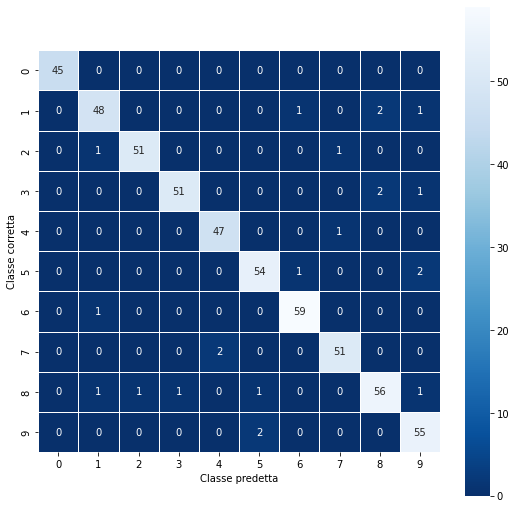

In [22]:
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, cmap='Blues_r', linewidths=.5, square=True)
plt.ylabel('Classe corretta')
plt.xlabel('Classe predetta')

Nonostante questo, scikit-learn implementa anche una classe apposita per l'OvA, la <span style="font-family: Monaco">OneVsRestClassifier</span>

In [23]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(LogisticRegression()) # Utilizziamo la regressione logistica come classificatore
ovr.fit(X_train, Y_train)

y_pred_proba = ovr.predict_proba(X_test)
y_pred = ovr.predict(X_test)

print("ACCURACY: "+str(accuracy_score(Y_test, y_pred)))
print("LOG LOSS: "+str(log_loss(Y_test, y_pred_proba)))

ACCURACY: 0.9574074074074074
LOG LOSS: 0.22839278150297312


Come vedi i risultati sono identici... non proprio